make plots of the simulation time bootstrapping  
the statistic of interest here is the diffusion coefficient    
the data is taken from the supplementary material table S12  
3nm membranes

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 1 µs intervals (all three hexane simulations)
data_1us_combined = np.array([
    [84.66, 85.43, 83.62, 88.27, 83.94, 87.82, 87.53, 84.97, 88.98, 84.60],  # Hexane Sim 1
    [85.71, 87.65, 84.79, 85.99, 88.89, 83.96, 86.25, 83.91, 82.26, 85.20],  # Hexane Sim 2
    [85.55, 85.80, 85.00, 84.41, 86.54, 86.89, 86.12, 83.00, 83.96, 85.08]   # Hexane Sim 3
])

# 2 µs intervals (all three hexane simulations)
data_2us_combined = np.array([
    [83.79, 84.79, 84.96, 85.48, 85.51],  # Hexane Sim 1
    [85.64, 84.21, 85.45, 83.71, 83.09],  # Hexane Sim 2
    [84.49, 84.54, 85.55, 82.62, 84.31]   # Hexane Sim 3
])

# 5 µs intervals (all three hexane simulations)
data_5us_combined = np.array([
    [83.34, 85.24],  # Hexane Sim 1
    [84.72, 82.73],  # Hexane Sim 2
    [84.18, 83.16]   # Hexane Sim 3
])

# 10 µs intervals (all three hexane simulations)
data_10us_combined = np.array([
    [84.12],  # Hexane Sim 1
    [83.55],  # Hexane Sim 2
    [83.50]   # Hexane Sim 3
])



now the plotting
make a box plot for each bootstrap sim length

Text(0, 0.5, 'Time (ms)')

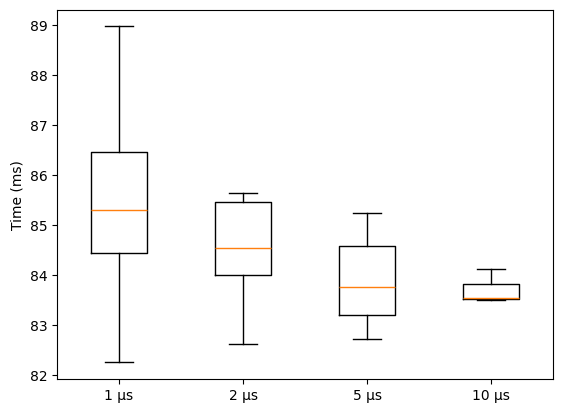

In [40]:
plt.figure()
data_1us = data_1us_combined.flatten()
data_2us = data_2us_combined.flatten()
data_5us = data_5us_combined.flatten()
data_10us = data_10us_combined.flatten()
plt.boxplot([data_1us, data_2us, data_5us, data_10us])
plt.xticks([1, 2, 3, 4], ['1 µs', '2 µs', '5 µs', '10 µs'])
plt.ylabel('Time (ms)')

now a more beautiful plot  
I want three lines. one dark orange one representing the mean for each sim length  
two dark blue lines that represent the upper line of the boxplots and the lower line of the boxplots.  
And between those two dark lines i want a light blue filling.  

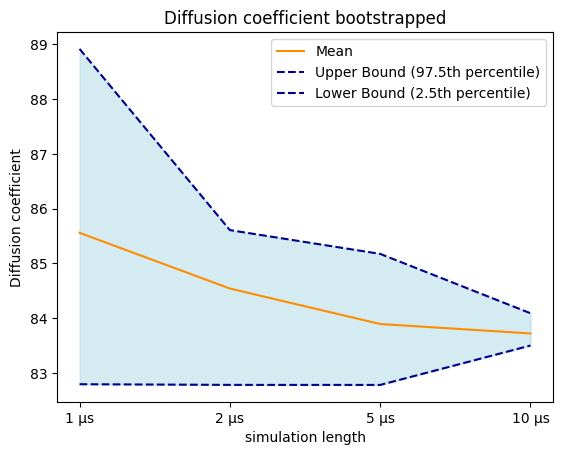

In [43]:
plt.figure()
means = [np.mean(data_1us), np.mean(data_2us), np.mean(data_5us), np.mean(data_10us)]
upper_bounds = [np.percentile(data_1us, 97.5), np.percentile(data_2us, 97.5), np.percentile(data_5us, 97.5), np.percentile(data_10us, 97.5)]
lower_bounds = [np.percentile(data_1us, 2.5), np.percentile(data_2us, 2.5), np.percentile(data_5us, 2.5), np.percentile(data_10us, 2.5)]

x = [1, 2, 3, 4]

plt.plot(x, means, color='darkorange', label='Mean')
plt.plot(x, upper_bounds, color='darkblue', linestyle='--', label='Upper Bound (97.5th percentile)')
plt.plot(x, lower_bounds, color='darkblue', linestyle='--', label='Lower Bound (2.5th percentile)')
plt.fill_between(x, lower_bounds, upper_bounds, color='lightblue', alpha=0.5)

plt.xticks([1, 2, 3, 4], ['1 µs', '2 µs', '5 µs', '10 µs'])	
plt.ylabel('Diffusion coefficient')
plt.xlabel('simulation length')
plt.title('Diffusion coefficient bootstrapped')
plt.legend()

checking the histograms

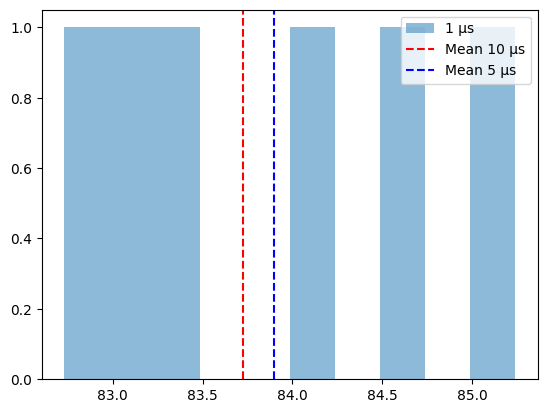

In [42]:
plt.figure()
plt.hist(data_5us, bins=10, alpha=0.5, label='1 µs')
#line for the actual mean from 10us
plt.axvline(x=np.mean(data_10us), linestyle='--', label='Mean 10 µs', color='red')
# mean of the 1us data
plt.axvline(x=np.mean(data_5us), linestyle='--', label='Mean 5 µs', color='blue')
plt.legend()

the means are very close together